<a href="https://colab.research.google.com/github/FatemehNMT/Visual-SLAM-Book-Google-Colab/blob/main/Chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 4: Cameras and Images**

**Chapter Reference:** https://github.com/gaoxiang12/slambook2/tree/master/ch5

## **Mount**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


## **Examples**

OpenCV is pre-installed in Google Colab, so you can use it without needing to install it separately.\
Located in "/usr/include/opencv4"

In [ ]:
import cv2
print(cv2.__version__)

4.11.0


In [ ]:
%cd /content

/content


### **SLAM Book 2: Basic OpenCV Images Operations**

**Page 89**\
https://github.com/gaoxiang12/slambook2/blob/master/ch5/imageBasics/imageBasics.cpp

In [ ]:
!mkdir MyExample
%cd MyExample

/content/MyExample


In [ ]:
%%writefile imageBasics.cpp
#include <iostream>
#include <chrono>
#include <string>

using namespace std;

#include <opencv2/core/core.hpp>
#include <opencv2/highgui/highgui.hpp>

string image_file = "/content/drive/MyDrive/slambook_data/ch5/ubuntu.png";   // Please make sure the path is correct

int main(int argc, char **argv) {
  // Read the image specified by argv[1].
  cv::Mat image;
  image = cv::imread(image_file); //cv::imread function reads the image in the specified path

  // Determine whether the image file is loaded correctly.
  if (image.data == nullptr) { // Maybe the file doesn't exist.
    cerr << "document" << argv[1] << "Does not exist." << endl;
    return 0;
  }

  // The file is read successfully, and some basic information is displayed in the output first
  cout << "Image width is" << image.cols << ",Gao Wei" << image.rows << ",The number of channels is" << image.channels() << endl;
  // cv::imshow("image", image);      // Displaying images with cv::imshow
  // cv::waitKey(0);                  // Pause the program and wait for a key input

  // ********************
  // save images instead of using "imshow".
  std::cout<<"number of rows 1: "<< image.rows<< endl;
  std::cout<<"number of cols 1: "<< image.cols<< endl;

  // std::cout<<image;
  imwrite("image_1.png", image);
  // ********************

  // Determine the type of image
  if (image.type() != CV_8UC1 && image.type() != CV_8UC3) {
    // The image type does not meet the requirements
    cout << "Please enter a color or grayscale image." << endl;
    return 0;
  }

  // Traverse the image, note that the following traversal method can also be used for random pixel access.
  // Use std::chrono to time the algorithm
  chrono::steady_clock::time_point t1 = chrono::steady_clock::now();
  for (size_t y = 0; y < image.rows; y++) {
    // Use cv::Mat::ptr to get the row pointer of the image
    unsigned char *row_ptr = image.ptr<unsigned char>(y);  // row_ptr is the head pointer of row y
    for (size_t x = 0; x < image.cols; x++) {
      // Access the pixel at x,y
      unsigned char *data_ptr = &row_ptr[x * image.channels()]; // data_ptr points to the pixel data to be accessed
      // Output each channel of the pixel. If it is a grayscale image, there is only one channel
      for (int c = 0; c != image.channels(); c++) {
        unsigned char data = data_ptr[c]; //data is the value of the cth channel of I(x,y)
      }
    }
  }
  chrono::steady_clock::time_point t2 = chrono::steady_clock::now();
  chrono::duration<double> time_used = chrono::duration_cast < chrono::duration < double >> (t2 - t1);
  cout << "Time to traverse the image:" << time_used.count() << " Second." << endl;

  // About cv::Mat copy
  // Direct assignment does not copy data
  cv::Mat image_another = image;
  // Modifying image_another will cause image to change
  image_another(cv::Rect(0, 0, 100, 100)).setTo(0); // Set the 100*100 block in the upper left corner to zero
  // cv::imshow("image", image);
  // cv::waitKey(0);

  // ********************
  // save images
  std::cout<<"number of rows 2: "<< image.rows<< endl;
  std::cout<<"number of cols 2: "<< image.cols<< endl;

  // std::cout<<image;
  imwrite("image_2.png", image_another);
  // ********************

  // Use the clone function to copy data
  cv::Mat image_clone = image.clone();
  image_clone(cv::Rect(0, 0, 100, 100)).setTo(255);
  // cv::imshow("image", image);
  // cv::imshow("image_clone", image_clone);
  // cv::waitKey(0);

  // ********************
  // save images
  std::cout<<"number of rows 3: "<< image.rows<< endl;
  std::cout<<"number of cols 3: "<< image.cols<< endl;

  // std::cout<<image;
  imwrite("image_3.png", image_clone);
  // ********************
  // There are many basic operations for images, such as shearing, rotating,
  // scaling, etc., which are not introduced one by one due to space limitations.
  // Please refer to the OpenCV official documentation for the calling method of each function.
  cv::destroyAllWindows();

  return 0;
}

Writing imageBasics.cpp


In [ ]:
%%writefile CMakeLists.txt
cmake_minimum_required(VERSION 3.31)
project(imageBasics)

add_executable(imageBasics imageBasics.cpp)

# Linking OpenCV Library
# include_directories("/usr/include/opencv4")
find_package(OpenCV REQUIRED)
include_directories(${OpenCV_INCLUDE_DIRS})
target_link_libraries(imageBasics ${OpenCV_LIBS})

Overwriting CMakeLists.txt


#### **Using CMake**

In [ ]:
!mkdir build
%cd build

/content/MyExample/build


In [ ]:
!cmake ..

-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found OpenCV: /usr (found version "4.5.4")
-- Configuring done (0.4s)
-- Generating done (0.0s)
-- Build files have been written to: /content/MyExample/build


In [ ]:
!make imageBasics

[ 50%] Building CXX object CMakeFiles/imageBasics.dir/imageBasics.cpp.o
[100%] Linking CXX executable imageBasics
[100%] Built target imageBasics


In [ ]:
!./imageBasics

Image width is1200,Gao Wei674,The number of channels is3
number of rows 1: 674
number of cols 1: 1200
Time to traverse the image:0.0171109 Second.
number of rows 2: 674
number of cols 2: 1200
number of rows 3: 674
number of cols 3: 1200


image_1


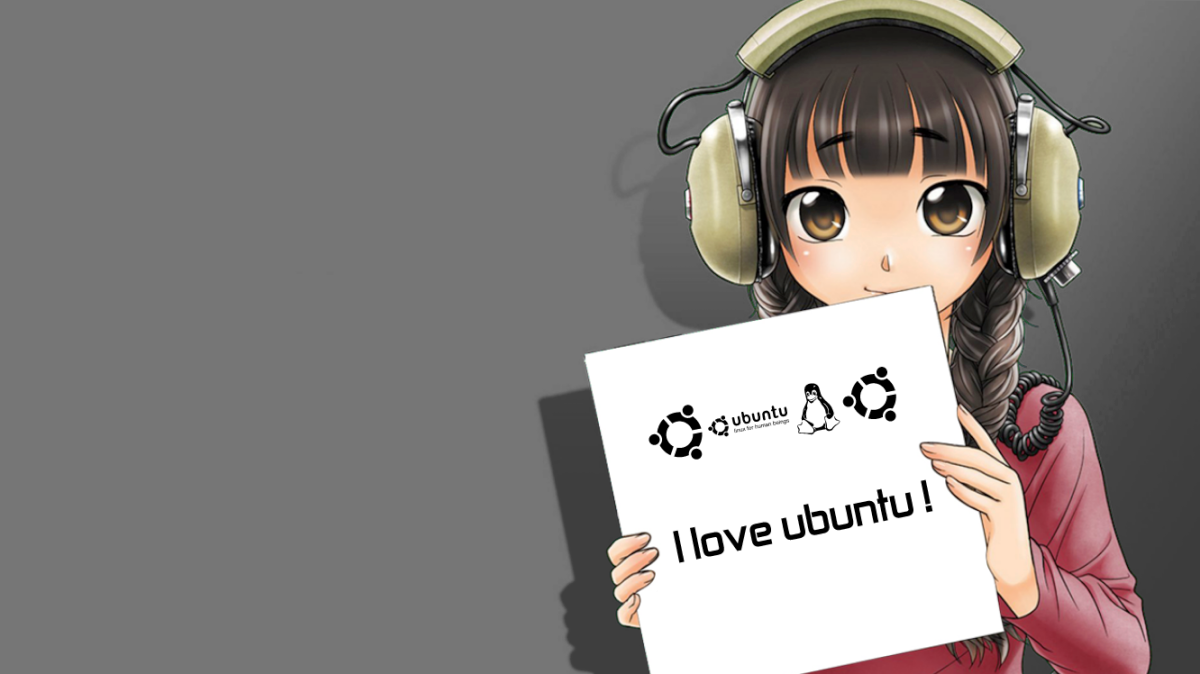

image_2


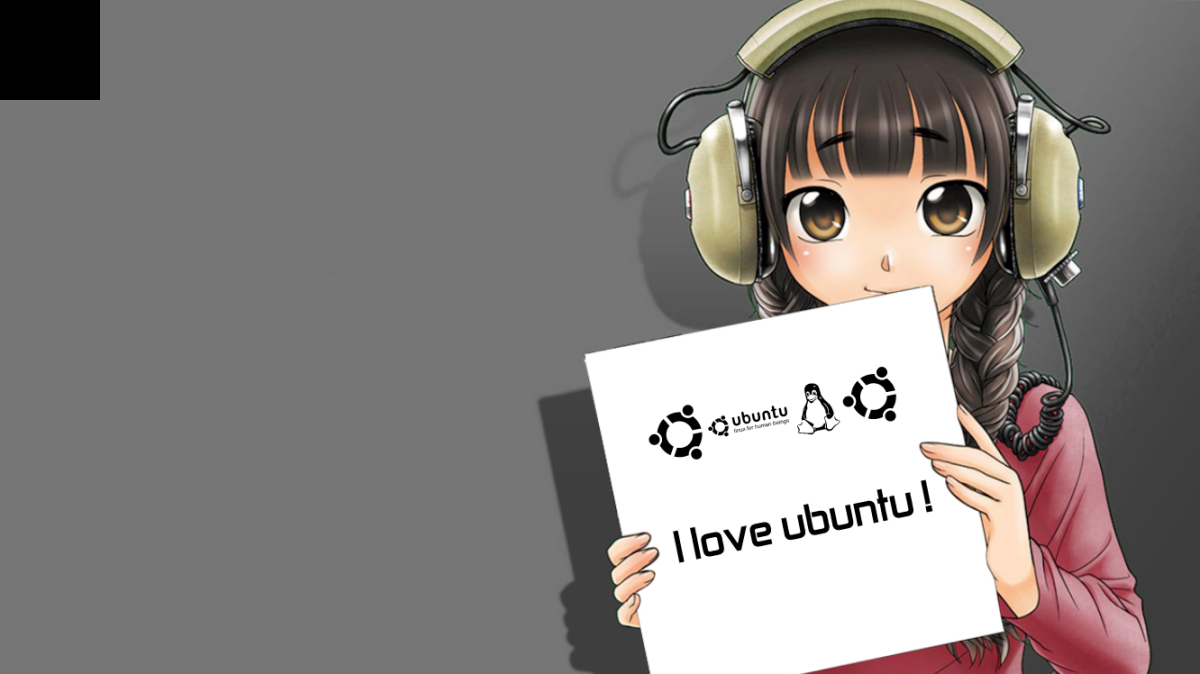

image_3


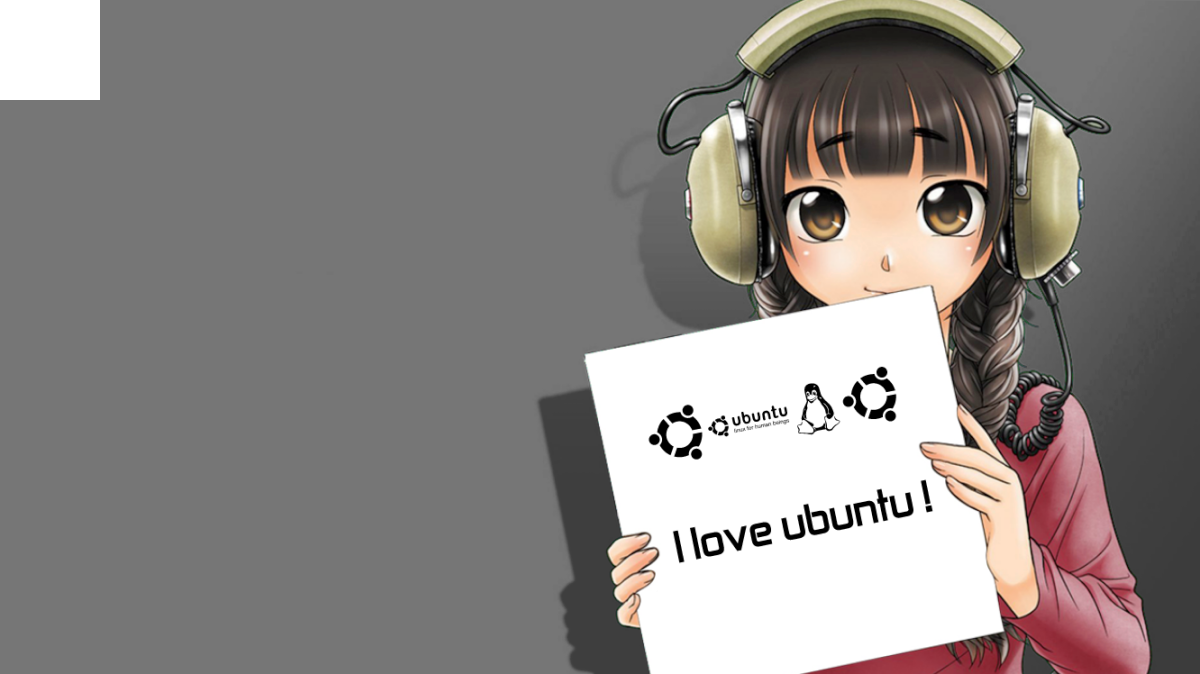

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
print("image_1")
cv2_imshow(cv2.imread("/content/MyExample/build/image_1.png"))
print("image_2")
cv2_imshow(cv2.imread("/content/MyExample/build/image_2.png"))
print("image_3")
cv2_imshow(cv2.imread("/content/MyExample/build/image_3.png"))

#### **Without CMake**

In [ ]:
%cd ..

/content/MyExample


In [ ]:
%%script bash
g++ imageBasics.cpp -o out -I/usr/include/opencv4 -lopencv_core -lopencv_videoio -lopencv_highgui -I/usr/include/opencv4/opencv  -lopencv_stitching -lopencv_aruco -lopencv_bgsegm -lopencv_bioinspired -lopencv_ccalib -lopencv_dnn_objdetect -lopencv_dnn_superres -lopencv_dpm -lopencv_face -lopencv_freetype -lopencv_fuzzy -lopencv_hdf -lopencv_hfs -lopencv_img_hash -lopencv_line_descriptor -lopencv_quality -lopencv_reg -lopencv_rgbd -lopencv_saliency -lopencv_shape -lopencv_stereo -lopencv_structured_light -lopencv_phase_unwrapping -lopencv_superres -lopencv_optflow -lopencv_surface_matching -lopencv_tracking -lopencv_datasets -lopencv_text -lopencv_dnn -lopencv_plot -lopencv_ml -lopencv_videostab -lopencv_viz -lopencv_ximgproc -lopencv_video -lopencv_xobjdetect -lopencv_objdetect -lopencv_calib3d -lopencv_imgcodecs -lopencv_features2d -lopencv_flann -lopencv_xphoto -lopencv_photo -lopencv_imgproc


In [ ]:
!./out

Image width is1200,Gao Wei674,The number of channels is3
number of rows 1: 674
number of cols 1: 1200
Time to traverse the image:0.0117504 Second.
number of rows 2: 674
number of cols 2: 1200
number of rows 3: 674
number of cols 3: 1200


image_1


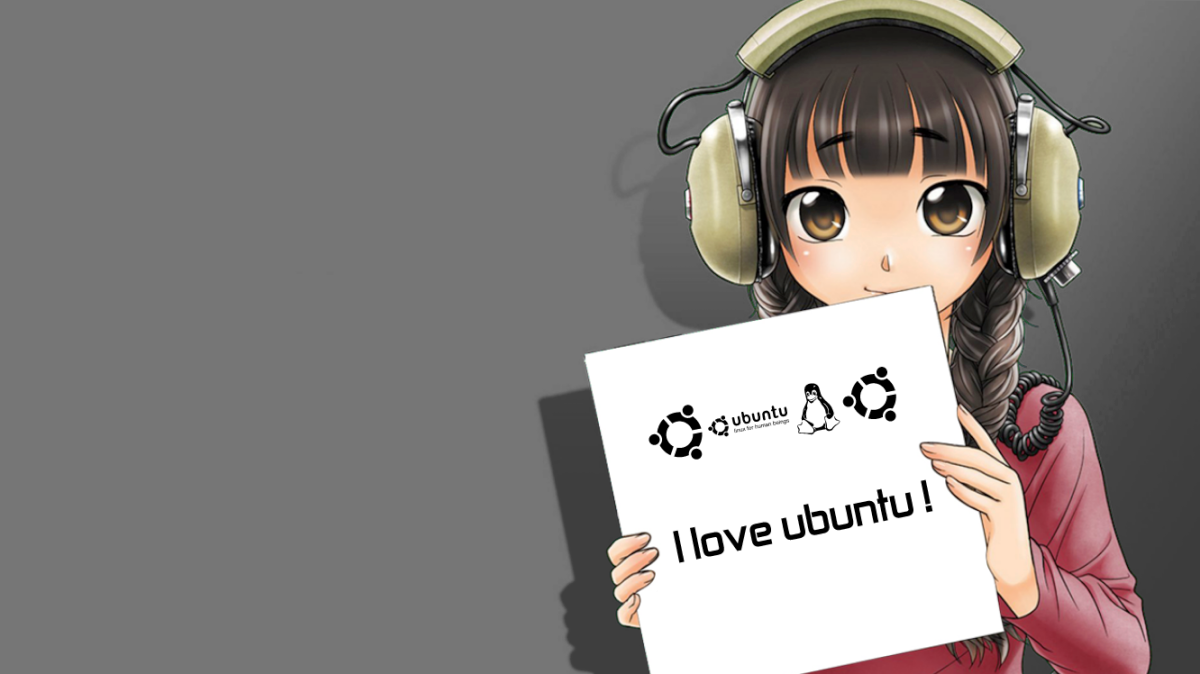

image_2


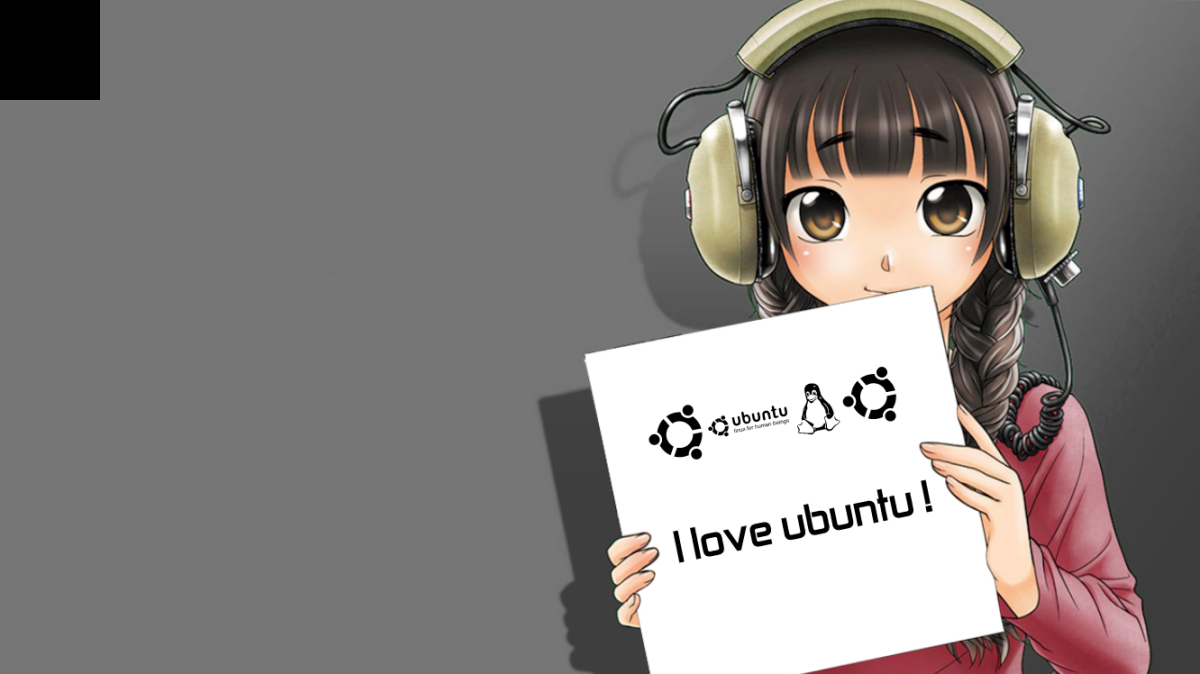

image_3


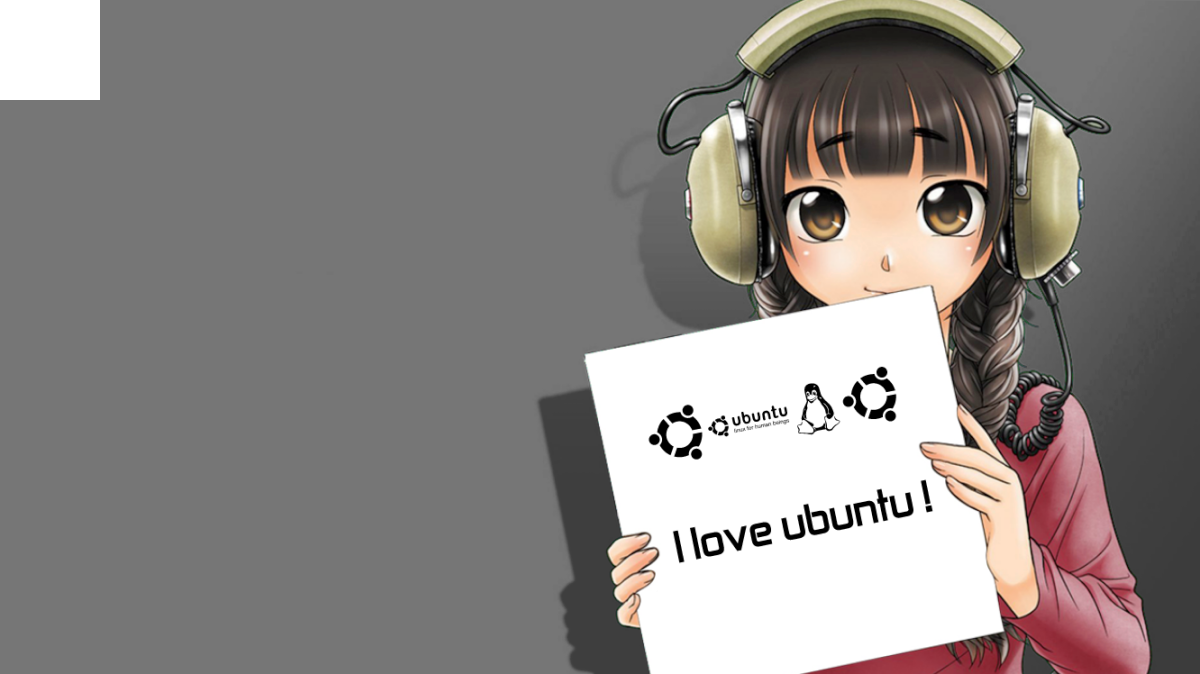

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
print("image_1")
cv2_imshow(cv2.imread("/content/MyExample/image_1.png"))
print("image_2")
cv2_imshow(cv2.imread("/content/MyExample/image_2.png"))
print("image_3")
cv2_imshow(cv2.imread("/content/MyExample/image_3.png"))

### **SLAM Book 2: Image Undistortion**

**Page 91**\
https://github.com/gaoxiang12/slambook2/blob/master/ch5/imageBasics/undistortImage.cpp

In [ ]:
%cd /content

/content


In [ ]:
!mkdir MyExample_2
%cd MyExample_2

/content/MyExample_2


In [ ]:
%%writefile CMakeLists.txt
cmake_minimum_required(VERSION 3.31)
project(imageBasics)

add_executable(undistortImage undistortImage.cpp)
# Linking OpenCV Library
# include_directories("/usr/include/opencv4")
find_package(OpenCV REQUIRED)
include_directories(${OpenCV_INCLUDE_DIRS})
target_link_libraries(undistortImage ${OpenCV_LIBS})

Writing CMakeLists.txt


In [ ]:
%%writefile undistortImage.cpp
#include <opencv2/opencv.hpp>
#include <string>

using namespace std;

string image_file = "/content/drive/MyDrive/slambook_data/ch5/distorted.png";   // Please make sure the path is correct

int main(int argc, char **argv) {

  // This program implements the code for the distortion removal part. Although
  //we can call OpenCV's distortion removal, it is helpful to implement it ourselves.
  // Distortion parameters
  double k1 = -0.28340811, k2 = 0.07395907, p1 = 0.00019359, p2 = 1.76187114e-05;
  // Internal reference
  double fx = 458.654, fy = 457.296, cx = 367.215, cy = 248.375;

  cv::Mat image = cv::imread(image_file, 0);   // The image is grayscale，CV_8UC1
  int rows = image.rows, cols = image.cols;
  cv::Mat image_undistort = cv::Mat(rows, cols, CV_8UC1);   // Image after dedistortion


  // Calculate the content of the dedistorted image
  for (int v = 0; v < rows; v++) {
    for (int u = 0; u < cols; u++) {
      // According to the formula, calculate the coordinates of the point (u, v)
      // corresponding to the distorted image(u_distorted, v_distorted)
      double x = (u - cx) / fx, y = (v - cy) / fy;
      double r = sqrt(x * x + y * y);
      double x_distorted = x * (1 + k1 * r * r + k2 * r * r * r * r) + 2 * p1 * x * y + p2 * (r * r + 2 * x * x);
      double y_distorted = y * (1 + k1 * r * r + k2 * r * r * r * r) + p1 * (r * r + 2 * y * y) + 2 * p2 * x * y;
      double u_distorted = fx * x_distorted + cx;
      double v_distorted = fy * y_distorted + cy;

      // Assignment (Nearest Neighbor Interpolation)
      if (u_distorted >= 0 && v_distorted >= 0 && u_distorted < cols && v_distorted < rows) {
        image_undistort.at<uchar>(v, u) = image.at<uchar>((int) v_distorted, (int) u_distorted);
      } else {
        image_undistort.at<uchar>(v, u) = 0;
      }
    }
  }


  // save images
  // Draw the image after dedistortion
  // cv::imshow("distorted", image);
  // cv::imshow("undistorted", image_undistort);
  // cv::waitKey();

  std::cout<<"number of rows: "<< rows<< endl;
  std::cout<<"number of cols: "<< cols<< endl;

  // std::cout<<image;
  imwrite("distorted.png", image);

  // std::cout<<image_undistort;
  imwrite("undistorted.png", image_undistort);

  return 0;
}

Overwriting undistortImage.cpp


#### **Using CMake**

In [ ]:
!mkdir build
%cd build

/content/MyExample_2/build


In [ ]:
!cmake ..

-- Configuring done (0.0s)
-- Generating done (0.0s)
-- Build files have been written to: /content/MyExample_2/build


In [ ]:
!make undistortImage

[ 50%] Building CXX object CMakeFiles/undistortImage.dir/undistortImage.cpp.o
[100%] Linking CXX executable undistortImage
[100%] Built target undistortImage


In [ ]:
! ./undistortImage

number of rows: 480
number of cols: 752


Distorted Image


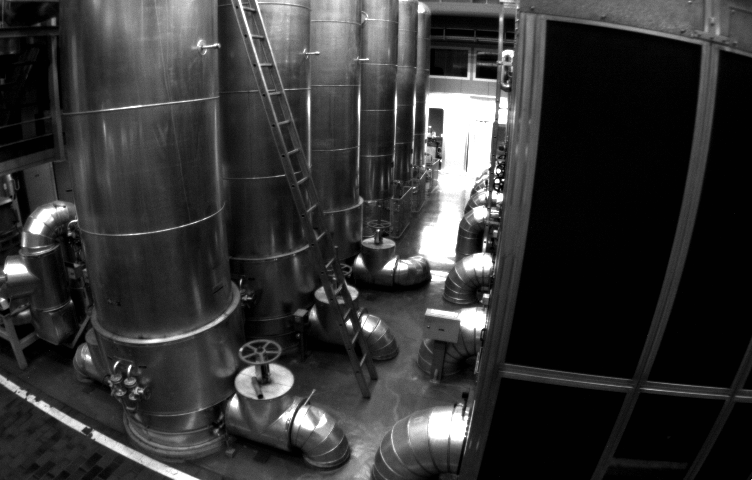

Undistorted Image


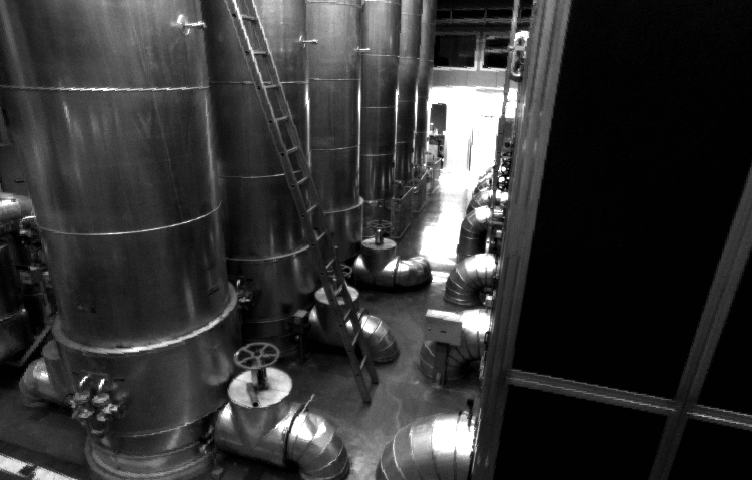

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
print("Distorted Image")
cv2_imshow(cv2.imread("/content/MyExample_2/build/distorted.png"))
print("Undistorted Image")
cv2_imshow(cv2.imread("/content/MyExample_2/build/undistorted.png"))

#### **Without CMake**

In [ ]:
%cd ..

/content/MyExample_2


In [ ]:
%%script bash

g++ undistortImage.cpp -o out -I/usr/include/opencv4 -lopencv_core -lopencv_videoio -lopencv_highgui -I/usr/include/opencv4/opencv  -lopencv_stitching -lopencv_aruco -lopencv_bgsegm -lopencv_bioinspired -lopencv_ccalib -lopencv_dnn_objdetect -lopencv_dnn_superres -lopencv_dpm -lopencv_face -lopencv_freetype -lopencv_fuzzy -lopencv_hdf -lopencv_hfs -lopencv_img_hash -lopencv_line_descriptor -lopencv_quality -lopencv_reg -lopencv_rgbd -lopencv_saliency -lopencv_shape -lopencv_stereo -lopencv_structured_light -lopencv_phase_unwrapping -lopencv_superres -lopencv_optflow -lopencv_surface_matching -lopencv_tracking -lopencv_datasets -lopencv_text -lopencv_dnn -lopencv_plot -lopencv_ml -lopencv_videostab -lopencv_viz -lopencv_ximgproc -lopencv_video -lopencv_xobjdetect -lopencv_objdetect -lopencv_calib3d -lopencv_imgcodecs -lopencv_features2d -lopencv_flann -lopencv_xphoto -lopencv_photo -lopencv_imgproc


In [ ]:
!./out

number of rows: 480
number of cols: 752


Distorted Image


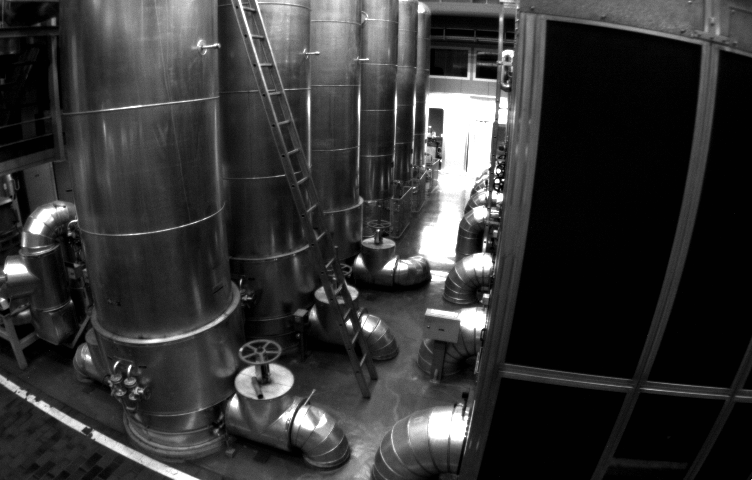

Undistorted Image


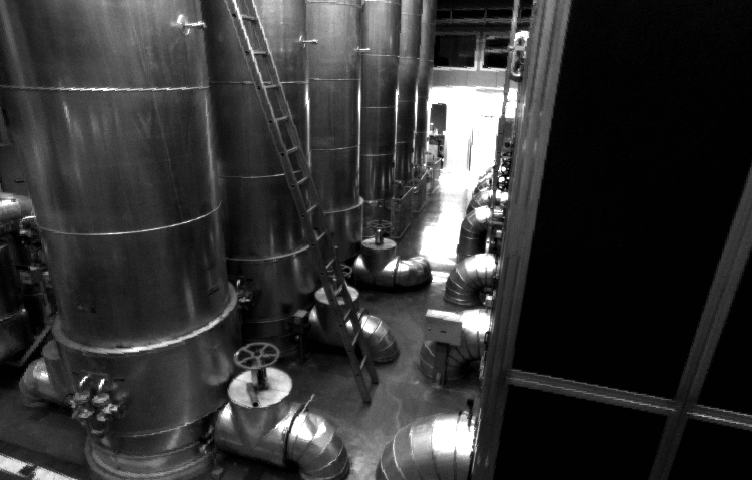

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
print("Distorted Image")
cv2_imshow(cv2.imread("/content/MyExample_2/distorted.png"))
print("Undistorted Image")
cv2_imshow(cv2.imread("/content/MyExample_2/undistorted.png"))